# Simple Linear Regression #
## Python Tutorial ##

Linear regression is an approach to model data that posess a linear correlation


Basically in the form: 

$$ y=m x + b $$

Which is tyipcally written and will now be referred to now as:

$$ y=\alpha +\beta x $$

Where $$\alpha = b, \hspace{5mm}\beta = m $$



However in most real world cases there is some deviation from an exact linear relation and there tends to be some error in each value so the best representation for any data point denoted by i is:

$$  y_i = \alpha + \beta x_i + \varepsilon_i $$

The aim is to create a linear function that can most accurately model the relationship between 2 variables basically x is a singular variable and not a matrix which is the simple in simple linear regression
<hr/>

### Importing Libraries ###

Here are pieces of other people's code that will help as understand what we're doing along the way

To install these click terminal on whichever IDE you're using and use pip to instal eg: <code>pip install matplotlib.pyplot</code>


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math

## How to do It ##

### Years of experience to salary dataset ###

This is a dataset downloaded from kaggle but it's on the repository just download it

We will train and run our model on it

In [4]:
salary_data = pd.read_csv("data/Salary_dataset.csv")
salary_data.drop("Unnamed: 0", axis=1, inplace=True)
salary_data.head()

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0


In [5]:
# Not important but if you want to see more data
salary_data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.413333,76004.000000
std,2.837888,27414.429785
min,1.200000,37732.000000
25%,3.300000,56721.750000
50%,4.800000,65238.000000
75%,7.800000,100545.750000
max,10.600000,122392.000000


We can plot the data on a graph

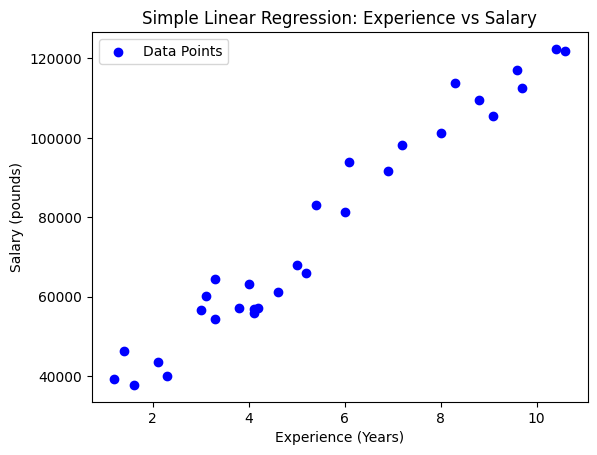

In [6]:
x = salary_data["YearsExperience"]
y = salary_data["Salary"]

# Create a scatter plot of the data points
plt.scatter(x, y, color="blue", label="Data Points")

# Label the axes and add a title
plt.xlabel("Experience (Years)")
plt.ylabel("Salary (pounds)")
plt.title("Simple Linear Regression: Experience vs Salary")

# Add a legend
plt.legend()

# Show the plot
plt.show()

### Training a model ###

<!-- We download/import a set of data to train our model on and set of data to test the model on -->

We use split the data in order to train it

Import this using <code>pip install -U scikit-learn</code>

We use it to split the data into a train set and a test set

There will be a lot of math and proofs but feel free to collapse it if you don't care for the proof and just trust me with the final equations

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.33
)

We can plot the train data:

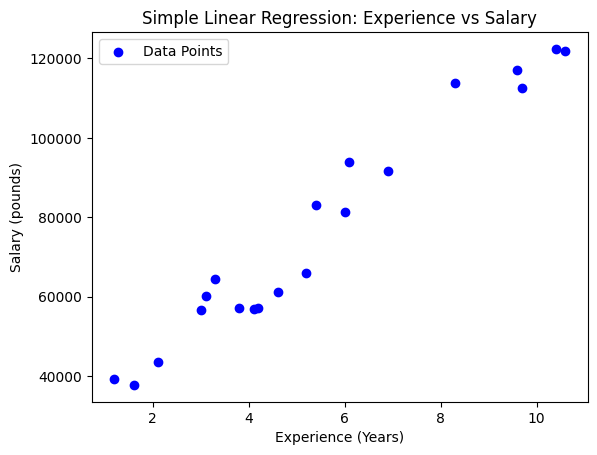

In [9]:
# Create a scatter plot of the data points
plt.scatter(x_train, y_train, color="blue", label="Data Points")

# Label the axes and add a title
plt.xlabel("Experience (Years)")
plt.ylabel("Salary (pounds)")
plt.title("Simple Linear Regression: Experience vs Salary")

# Add a legend
plt.legend()

# Show the plot
plt.show()

## Math ##
Now we have data points and we need to calculate the gradient and y-intercept of the line of best fit

However we have an error in each point where we want to minimise to have the least effect on the line of best fit

This is the long bit where i derive the formulas we use its a bit long and rigorous so feel free to collapse the proof(click on the arrow beside derivations) however if you're curious to know there it is

### Derivations ###

Let's isolate the error value from the equation:

$$  y_i = \alpha + \beta x_i + \varepsilon_i $$

to:

$$ \varepsilon_i = y_i - \alpha - \beta x_i $$

The total absolute error is given by:

$$ E = \sum_{i=1}^{n} (y_{i} - \alpha - \beta x_{i})^2 \tag{1} $$

Because errors can be positive or negative we square each error term to be positive this is called the sum of squared residuals which is denoted as SSR or RSS

We want to minimise this value relative to both alpha and beta in order to get the most accurate line

Let's start with alpha: to minimise the variable relative to another we find the partial derivative and equate it to 0

This gives us:

$$ \frac{\partial E}{\partial \alpha}=\sum_{i=1}^{n}2\left(y_{i}-\alpha-\beta x_{i}\right)=0 \tag{2} $$

Divide out by -2 on both sides gives us:

$$ \frac{\partial E}{\partial \alpha}=\sum_{i=1}^{n} \left(y_{i}-\alpha-\beta x_{i}\right)=0 \tag{3} $$

Expand the brackets to give us:

$$ \sum_{i=1}^{n} y_{i} - \sum_{i=1}^{n} \alpha - \sum_{i=1}^{n}\beta x_{i} = 0 \tag{4}$$

Remember:

$$ \sum_{i=1}^{n} y_{i} = N{\bar {y}}, \hspace{5mm} \sum_{i=1}^{n} x_{i} = N{\bar {x}} \hspace{5mm} and \hspace{5mm} \sum_{i=1}^{n} c = Nc \tag{5} $$

Then you can substitue rearange to give you:

$$ n \alpha=n \bar{y}-n \beta \bar{x} \tag{6}$$

Dividing out by n gets us:

$$ \alpha=\bar{y}-\beta \bar{x} \tag{7} $$ 

To get beta we do the same thing: minimising the function relative to it which gives us:

$$ \frac{\partial E}{\partial \beta}=\sum_{i=1}^{n}-2x_{i}\left(y_{i}-\alpha-\beta x_{i}\right)=0 \tag{8} $$

divide out by -2:

$$ \frac{\partial E}{\partial \beta}=\sum_{i=1}^{n}x_{i}\left(y_{i}-\alpha-\beta x_{i}\right)=0 \tag{9} $$

We multiply out the x to give us:

$$ \sum_{i=1}^{n} (x_{i} y_{i}-\alpha x_{i}-\beta x_{i}^{2})=0 \tag{10}$$

Substitute the $\alpha$ we got before:

$$ \sum_{i=1}^{n} (x_{i} y_{i}-x_{i}(\bar{y}-\beta \bar{x})-\beta x_{i}^{2})=0 \tag{11}$$

Expand it:

$$ \sum_{i=1}^{n} (x_{i}y_{i} - x_{i}\bar{y} + \beta x_{i}\bar{x} - \beta x_{i}^2) = 0 \tag{12}$$

Split it:

$$ \sum_{i=1}^{n} (x_{i}y_{i} - x_{i}\bar{y}) + \beta \sum_{i=1}^{n} (x_{i}\bar{x} - x_{i}^2) = 0 \tag{13} $$

Expanding further:

$$  \sum_{i=1}^{n} x_{i}y_{i} - \bar{y} \sum_{i=1}^{n} x_{i} + \beta\bar{x} \sum_{i=1}^{n} x_{i} - \beta \sum_{i=1}^{n} x_{i}^2 = 0 \tag{14}$$

Using the equations from before and rearanging we get:

$$ \sum_{i=1}^{n} x_{i}y_{i} - n\bar{x}\bar{y} = -\beta n \bar{x}^2 + \beta \sum_{i=1}^{n} x_{i}^2 \tag{15}$$

Solving for beta we get:

$$ \beta = \frac{\sum_{i=1}^{n} x_{i}y_{i} - n\bar{x}\bar{y}} {\sum_{i=1}^{n} x_{i}^2 - n\bar{x}^2} \tag{16}$$

While this is enough we can make it computationally easier, you can show:

$$ \hspace{5mm} \sum_{i=1}^{n}(x_{i} - \bar{x}) (y_{i} - \bar{y}) \hspace{2.5mm} = \hspace{2.5mm} \sum_{i=1}^{n} x_{i}y_{i} - n\bar{x}\bar{y} \tag{17}$$

and:

$$ \hspace{5mm} \sum _{i=1}^{n}(x_{i}-{\bar {x}})^{2} \hspace{2.5mm} = \hspace{2.5mm} \sum_{i=1}^{n} x_{i}^2 - n\bar{x} \tag{18} $$

We can therefore rewrite beta as:

$$ \beta = \frac{\sum _{i=1}^{n}(x_{i}-{\bar {x}})(y_{i}-{\bar {y}})}{\sum _{i=1}^{n}(x_{i}-{\bar {x}})^{2}}\tag{19} $$

### Final Equation gives us ###

$$ \alpha=\bar{y}-\beta \bar{x} $$ 

$$ \beta = \frac{\sum _{i=1}^{n}(x_{i}-{\bar {x}})(y_{i}-{\bar {y}})}{\sum _{i=1}^{n}(x_{i}-{\bar {x}})^{2}} $$


Note what we will be deriving is our estimated line of best fit which we denote with hat notation:

$$ y = \widehat{\alpha} + \widehat{\beta} x $$

Now lets calculate it with code

In [10]:
#You can also use loops to calculate mean but these are numpy arrays so you dont have to
xBar = x_train.mean()
yBar = y_train.mean()

#calculate the numerator and  denominator seperately
betahatNumerator = 0
betahatDenominator = 0

for x_i, y_i in zip(x_train, y_train):
    betahatNumerator += (x_i - xBar) * (y_i - yBar)
    betahatDenominator += (x_i - xBar) ** 2

betahat = betahatNumerator/betahatDenominator

alphahat = yBar - betahat * xBar

Let's plot and see how it looks

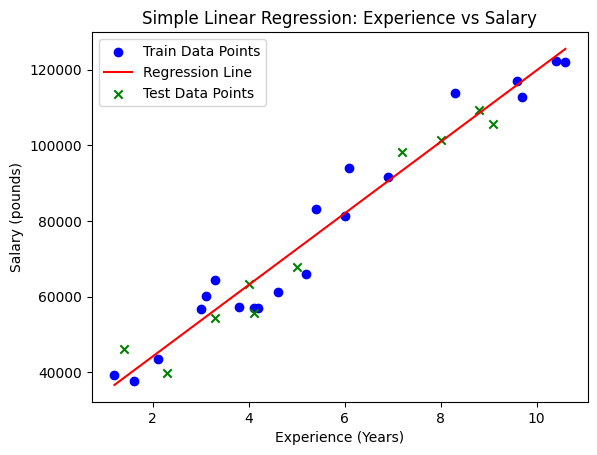

In [13]:
# Create a scatter plot of the data points
plt.scatter(x_train, y_train, color="blue", label="Train Data Points")

# Generate values for the regression line
x_values = np.linspace(min(x), max(x), 100)
y_values = betahat * x_values + alphahat

# Plot the regression line
plt.plot(x_values, y_values, color="red", label="Regression Line")

# Label the axes and add a title
plt.xlabel("Experience (Years)")
plt.ylabel("Salary (pounds)")
plt.title("Simple Linear Regression: Experience vs Salary")


# Add the test points
plt.scatter(x_test, y_test, color="green", label="Test Data Points", marker="x")

# Add a legend
plt.legend()

# Show the plot
plt.show()

### Test the Model ###

Now we test our model and see how well we predict it

To test it we compare the SSR and mean root squared error

Create a function that predicts the y value based on our regression line 

In [27]:
def yPred(x, alphahat, betahat):
    return alphahat + (betahat * x)


25318.44708286703

Here we make a function that goes over x and y to calculate the SSR of any data set


Remember from the initial step in the derivations:
$$ SSR = \sum_{i=1}^{n} (y_{i} - \widehat{\alpha} - \widehat{\beta} x_{i})^2 $$


In [18]:
def SSR(xSet, ySet, alphahat, betahat):
    SSR = 0
    for x_i, y_i in zip(xSet, ySet):
        SSR += (y_i - yPred(x_i, alphahat, betahat)) ** 2

    return SSR

If the ratio of test to train mean error is less than 1 it means the test data is within the predicted error we used to train

In [34]:
trainSSR = SSR(x_train, y_train, alphahat, betahat)
testSSR = SSR(x_test, y_test, alphahat, betahat)

# root mean of squared residuals
rmTrainSSR = math.sqrt(trainSSR / len(x_train))
rmTestSSR = math.sqrt(testSSR / len(x_test))

ratio = rmTestSSR/ rmTrainSSR
print(ratio)

0.8754797901012227


## Some notes ##

Won't go in depth on these here but perehaps in another tutorial

In order to know whether the data has a linear relationship you actually test the corellation of the data using pearson's correlation coeffeccient and the further away from 0 the better

The formula is similar to what we saw earlier gven as:

$$ r = \frac{\sum _{i=1}^{n}(x_{i}-{\bar {x}})(y_{i}-{\bar {y}})}{\sqrt{\sum _{i=1}^{n}(y_{i}-{\bar {y}})^{2} \sum _{i=1}^{n}(x_{i}-{\bar {x}})^{2}}} $$

Or more generally:

$$ r = \frac{Cov (X,Y)}{\sqrt{Var(X) Var(Y)}} $$